<a href="https://colab.research.google.com/github/A01749373/PortafolionImplementacionM2-Framework/blob/main/PortafolioImplementacionM2_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ariadna Jocelyn Guzmán Jiménez A01749373
# "  **Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.** "



---



---



## Lectura de datos

In [ ]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
columns = ["Sample_Code_Number",
           "Clump_Thickness", 
           "Uniformity_of_cell_size",
           "Uniformity_of_cell_shape",
           "Marginal_Adhesion",
           "Single_Epithelial_Cell_Size",
           "Bare_Nuclei",
           "Bland_Chromatin",
           "Normal_Nucleoli",
           "Mitoses",
           "Class"
           ]
cancer = pd.read_csv("breast-cancer-wisconsin.data", names = columns)
cancer.head()

,Sample_Code_Number,Clump_Thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Entendimiento de los datos

In [ ]:
# Numero de filas y columnas    
cancer.shape

(699, 11)

In [ ]:
# Informacion del dataframe
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_Code_Number           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_cell_size      699 non-null    int64 
 3   Uniformity_of_cell_shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
# Datos estadisticos
cancer.describe()

,Sample_Code_Number,Clump_Thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
# Numero de tumores malignos y no malignos
# 2 -> benigno
# 4 -> maligno
cancer['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


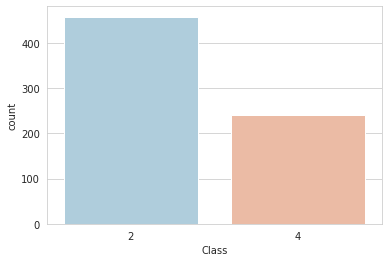

In [ ]:
# Visualizacion de la comparacion entre malignos y benignos
sns.set_style('whitegrid')
sns.countplot(cancer['Class'], palette='RdBu_r')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

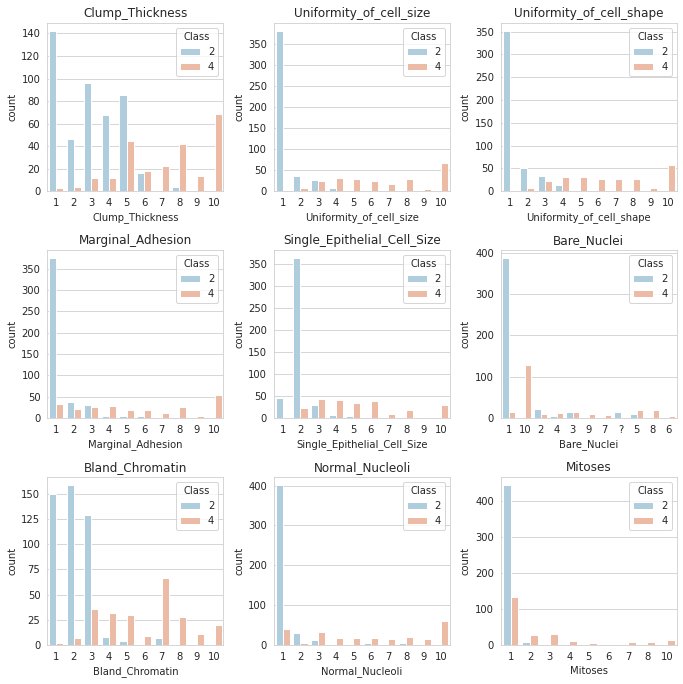

In [ ]:
# Tumores benignos o malignos de acuerdo a los datos de cada columna
cols = ["Clump_Thickness", 
        "Uniformity_of_cell_size",
        "Uniformity_of_cell_shape",
        "Marginal_Adhesion",
        "Single_Epithelial_Cell_Size",
        "Bare_Nuclei",
        "Bland_Chromatin",
        "Normal_Nucleoli",
        "Mitoses"]

n_rows = 3
n_cols = 3


fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        i = r*n_cols+ c     
        ax = axs[r][c]
        sns.countplot(cancer[cols[i]], hue = cancer["Class"], ax = ax, palette='RdBu_r')
        ax.set_title(cols[i])
        ax.legend(title="Class", loc='upper right') 
        
plt.tight_layout() 


##  Tratamiento de datos

In [ ]:
# Checar la existencia de datos nulos
cancer.isna().sum()

Sample_Code_Number             0
Clump_Thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
'''
La base de datos, contaba con un valor "?" en la columna Bare Nuclei,  el cual se utilizaba para indicar un valor no disponible.
Por tanto, es considerado como un valor nulo, solo que representado como un string que por consiguente, tomaba a todos los valores
de la columna como este tipo de dato. 
Para ello, comprobamos la existencia de este valor en el dataset y eliminamos las filas que lo contuvieran. Así, pasaríamos todos 
nuestros datos a números enteros.
'''

'?'	in cancer.Bare_Nuclei.values

True

In [ ]:
cancer = cancer.loc[cancer["Bare_Nuclei"] != '?', :]
cancer.head()

,Sample_Code_Number,Clump_Thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
convert_dict = {'Bare_Nuclei': int} 
  
cancer = cancer.astype(convert_dict)

In [ ]:
# Verificacion de el tipo de datos de cada columna
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample_Code_Number           683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Uniformity_of_cell_size      683 non-null    int64
 3   Uniformity_of_cell_shape     683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [ ]:
# Eliminacion de la columna ID, ya que no nos servirá los datos de prediccion
cancer = cancer.drop(["Sample_Code_Number"], axis = 1)
cancer.head()

,Clump_Thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Implementación del algoritmo "Random Forest Classifier"

In [ ]:
# Dividir los datos en variables x, y
x = cancer.iloc[:, 0:8]
y = cancer.iloc[:, 9].values

In [ ]:
# Dividir el dataset 
from sklearn.model_selection import train_test_split

# Modelo prueba 20% y entrenamiento 80%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# Escalamiento de los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [73]:
# Aplicacion de Random Forest
from sklearn.ensemble import RandomForestClassifier

for i in range (0, 12, 2):
  if (i > 0):
    forest = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
    model = forest.fit(x_train, y_train)
    print('Random Forest Classifier Training Accuracy with {} estimators: {}'.format(i, forest.score(x_train, y_train)))

Random Forest Classifier Training Accuracy with 2 estimators: 0.978021978021978
Random Forest Classifier Training Accuracy with 4 estimators: 0.9926739926739927
Random Forest Classifier Training Accuracy with 6 estimators: 0.9981684981684982
Random Forest Classifier Training Accuracy with 8 estimators: 0.9963369963369964
Random Forest Classifier Training Accuracy with 10 estimators: 0.9963369963369964


In [74]:
# Dado lo anterior, nos damos que a mayores estimadores, mayor precisión en la precisión del modelo, por lo que utilizaremos en esta ocasión 10 estimadores
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model = forest.fit(x_train, y_train)
# Muestra de las características importantes de la implementación
print("Random Forest Classifier Feature importances:", model.feature_importances_)

Random Forest Classifier Feature importances: [0.05022598 0.10586564 0.16594922 0.08150832 0.13913984 0.18091442
 0.12340735 0.15298923]


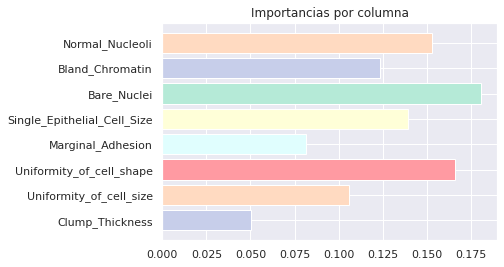

In [75]:
# Visualizacion de importancias
plt.barh(x.columns.values, model.feature_importances_, color = ["#C7CEEA", "#FFDAC1", "#FF9AA2", "#E0FEFE", "#FFFFD8", "#B5EAD7"])
plt.title("Importancias por columna")
plt.show()

In [76]:
# Parametros e informacion de la implementacion del modelo
print("Random Forest Classifier Feature Params:")
forest.get_params()

Random Forest Classifier Feature Params:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [77]:
# Calculo de predicciones del modelo
predictions =  model.predict(x_test)
print("Predicciones: ", predictions)
print("Valores estimados: ", y_test)

Predicciones:  [2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2
 2 2 4 2 2 2 4 2 4 2 2 4 2 4 4 2 4 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 4 2 2 2 4
 2 2 4 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 4 2 2 4 2 2 4 2]
Valores estimados:  [2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2
 2 2 4 2 2 2 4 2 4 2 2 4 2 2 4 2 4 2 4 4 4 2 4 4 4 2 2 2 4 4 2 2 4 4 2 2 4
 2 2 4 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 4 2 2 4 2 2 4 2]


[[84  3]
 [ 2 48]] 



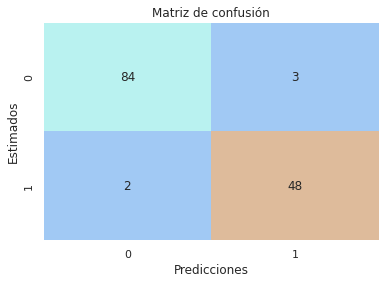

In [78]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
sns.set()
f,ax=plt.subplots()
matrix = confusion_matrix(y_test, predictions)
print(matrix, "\n")

colormap = sns.color_palette("pastel")
sns.heatmap(matrix, annot = True, ax = ax, cbar = False, cmap = colormap) 
ax.set_title('Matriz de confusión')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Estimados') 
plt.show()

## Errores medios 
*Diferencia entre los valores estimados y los predecidos.*

In [79]:
from sklearn import metrics
print("Error absoluto medio:", metrics.mean_absolute_error(y_test, predictions))
print("Error cuadrático medio: ", metrics.mean_squared_error(y_test, predictions))

Error absoluto medio: 0.072992700729927
Error cuadrático medio:  0.145985401459854
